# GEOG 5160 6160 Lab 07

# Introduction

For the next few labs, we'll be looking at deep learning models. As these are computationally costly models, they are generally built using specialized software to make them as efficient as possible. The full software stack consists of:

-   The backend deep learning software. This includes **tensorflow**, **torch** and **jax**.
-   The **keras** API. This is written in Python and tries to act as a unified interface to the different types of software

This offers a great amount of flexibility. If you want to develop very complex models, you can work directly with the deep learning package. If you need only to use standard functions, then you can use **keras**, and you can also set this to use a different backend. 

We'll mainly be using a combination of **keras** and **tensorflow** in this class, so the goals of this lab are to introduce these are get them running with a couple of simple examples.


## Objectives

-   Set up **keras** and **tensorflow** on your computer
-   Understand the basic operations in a neural network
-   Build a simple classification model using standard network layers
-   Train and evaluate this model

# Installation

Installing deep learning software can be quite complicated. The backend software is in continual and rapid development, so that the libraries change often. In addition, these often are set up to use any available GPU power rather than (or in addition to) CPU power, and this usually requires an extra step of installing drivers for this. Here, we'll try to use the simplest approach, which is to create a new environment (if you are using virtual environments), and use `pip` to install the necessary packages. 

### Conda 

If you are using `conda` as an environment manager, open a terminal and create a new environment:

```
conda create -n tf-5160 python=3.12
```

Then activate this to start the environment

```
conda activate tf-5160
```

In this class, we'll be using **tensorflow** as the backend for our labs, so use `pip` now to install this (this will install the correspoding version of **keras** with it)

```
pip install tensorflow
```

You'll also need the following packages, so again, use `pip` to install these

- **pandas**
- **matplotlib**

In [1]:
## OTHER TEXT HERE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

np.random.seed(42)

In [3]:
np_array = np.array([[1, 2, 3], [4, 5, 6]])
tf_tensor = tf.convert_to_tensor(np_array)

In [4]:
tf_tensor.shape

TensorShape([2, 3])

In [5]:
tf_tensor + tf_tensor

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>

In [6]:
np_array = np.array([[1, 2, 3, 4]])
tf.convert_to_tensor(np_array)

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[1, 2, 3, 4]])>

In [7]:
tf.constant([1, 2, 3], dtype="float32")

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [8]:
tf.ones(shape=(2, 1))
tf.zeros(shape=(2, 1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [9]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)


tf.Tensor(
[[-0.81882304]
 [ 1.1257674 ]
 [-0.32026288]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.88849676]
 [0.13861823]
 [0.14023113]], shape=(3, 1), dtype=float32)


In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.1015787 ],
       [0.43943548],
       [1.5166277 ]], dtype=float32)>


In [11]:
x = tf.random.normal(shape=(2, 3), mean=10., stddev=1.)
print(x)

tf.Tensor(
[[ 9.581345  9.651289  9.919462]
 [10.965187  8.800277  9.45687 ]], shape=(2, 3), dtype=float32)


In [12]:
tf.square(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 91.80216,  93.14738,  98.39573],
       [120.23533,  77.44487,  89.43239]], dtype=float32)>

In [13]:
tf.sqrt(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3.0953748, 3.1066523, 3.1495178],
       [3.3113723, 2.966526 , 3.0752025]], dtype=float32)>

There are also specific functions that are key to train a neural network. You might recall from the lecture that there are three main calculation steps. 

1) In the forward pass, the output of every neuron in the network is calculated as the weighted sum of the inputs, plus a bias term $y = W \cdot x + b$. The first part of this equation is the dot product of two matrices, the array of weights ($W$) and the input values ($x$). In tensorflow, this calculated using the `matmul` function.

For example, here we create tensors of weights and random input values and multiply them together:

W <- tf$Variable(array(runif(4), c(2,2)))
print(W)

x <- as_tensor(array(rnorm(4), c(2, 2)))
print(x)

In [14]:
W = tf.Variable(initial_value=tf.random.normal(shape=(2, 2)))
print(W)

x = tf.random.normal(shape=(2, 2), mean=0., stddev=1.)
print(x)

tf.matmul(x,W)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.3225357 ,  0.7843181 ],
       [ 0.40990606,  0.31980392]], dtype=float32)>
tf.Tensor(
[[ 0.3112704   0.44585034]
 [ 1.216556   -0.28395918]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.08236095,  0.38671967],
       [-0.5087793 ,  0.8633556 ]], dtype=float32)>

b <- tf$Variable(array(1, dim = c(2)))
print(b)

tf$matmul(x, W) + b

In [15]:
b = tf.Variable(initial_value=tf.constant(1., shape=(2)))
print(b)

tf.matmul(x, W) + b


<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.082361 , 1.3867197],
       [0.4912207, 1.8633556]], dtype=float32)>

x <- as_tensor(array(rnorm(100), c(100, 1)))
x_act <- activation_linear(x)
plot(x, x_act)

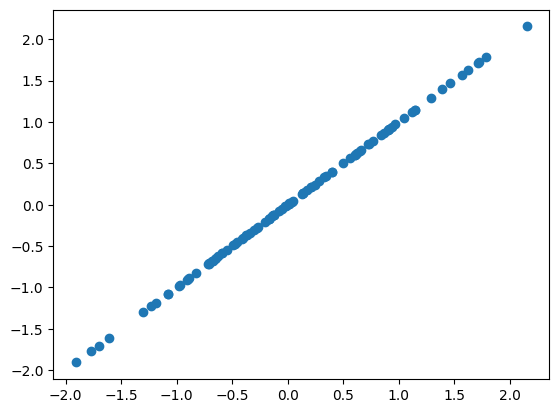

In [16]:
x = tf.random.normal(shape=(100, 1))
x_act = tf.keras.activations.linear(x)

plt.plot(x, x_act, 'o')

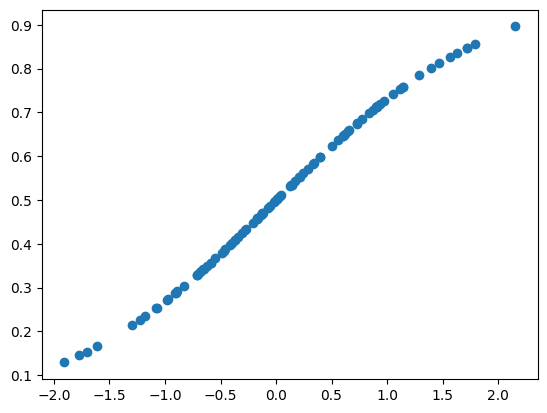

In [17]:
x_act = tf.keras.activations.sigmoid(x)

plt.plot(x, x_act, 'o')

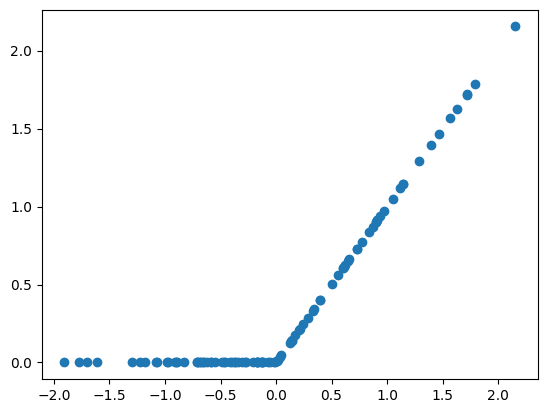

In [18]:
x_act = tf.keras.activations.relu(x)

plt.plot(x, x_act, 'o')

These functions can then be wrapped together to make a simple neural network function that describes the full forward pass (note that the `@tf.function` line compiles this so that it will run much faster than the original Python code)

In [19]:
@tf.function
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

x <- tf$Variable(0)
with(tf$GradientTape() %as% tape, {
  y <- 2 * x + 3
})
grad_of_y_wrt_x <- tape$gradient(y, x)
grad_of_y_wrt_x

In [20]:
x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = 2 * x + 3

grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [21]:
df = pd.read_csv("./datafiles/slc.csv")
df.head()

,x1,x2,class
0,0.766010,1.984742,neg
1,-0.143333,2.976064,neg
2,0.866285,2.447990,neg
3,1.344657,4.420691,neg
4,-0.060448,2.278719,neg


In [22]:
inputs = np.column_stack((df['x1'], df['x2'])).astype(np.float32)
inputs.shape

(2000, 2)

In [23]:
targets = np.where(df['class'] == 'neg', 0., 1.).astype(np.float32)
targets = targets[:,np.newaxis]

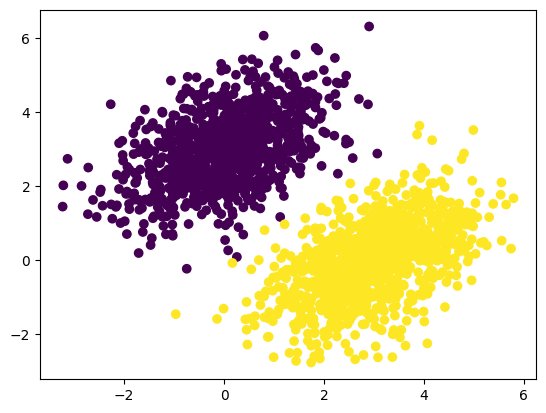

In [24]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()

In [25]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [26]:
def model(inputs, W, b):
    return tf.matmul(inputs, W) + b

In [27]:
def mean_squared_error(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [28]:
learning_rate = 0.1

@tf.function(jit_compile=True)
def training_step(inputs, targets, W, b):
    with tf.GradientTape() as tape:
        predictions = model(inputs, W, b)
        loss = mean_squared_error(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [29]:
for step in range(40):
    loss = training_step(inputs, targets, W, b)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 8.4095
Loss at step 1: 1.0548
Loss at step 2: 0.2798
Loss at step 3: 0.1848
Loss at step 4: 0.1631
Loss at step 5: 0.1503
Loss at step 6: 0.1393
Loss at step 7: 0.1293
Loss at step 8: 0.1203
Loss at step 9: 0.1120
Loss at step 10: 0.1045
Loss at step 11: 0.0976
Loss at step 12: 0.0913
Loss at step 13: 0.0856
Loss at step 14: 0.0804
Loss at step 15: 0.0756
Loss at step 16: 0.0712
Loss at step 17: 0.0673
Loss at step 18: 0.0636
Loss at step 19: 0.0603
Loss at step 20: 0.0573
Loss at step 21: 0.0546
Loss at step 22: 0.0521
Loss at step 23: 0.0498
Loss at step 24: 0.0477
Loss at step 25: 0.0458
Loss at step 26: 0.0441
Loss at step 27: 0.0425
Loss at step 28: 0.0410
Loss at step 29: 0.0397
Loss at step 30: 0.0385
Loss at step 31: 0.0374
Loss at step 32: 0.0364
Loss at step 33: 0.0355
Loss at step 34: 0.0347
Loss at step 35: 0.0339
Loss at step 36: 0.0332
Loss at step 37: 0.0326
Loss at step 38: 0.0320
Loss at step 39: 0.0315


I0000 00:00:1742063147.599312 7948201 service.cc:152] XLA service 0x1372186b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742063147.599330 7948201 service.cc:160]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1742063147.638942 7948201 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


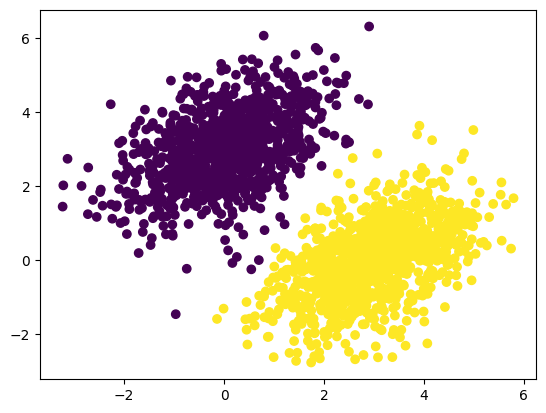

In [30]:
predictions = model(inputs, W, b)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

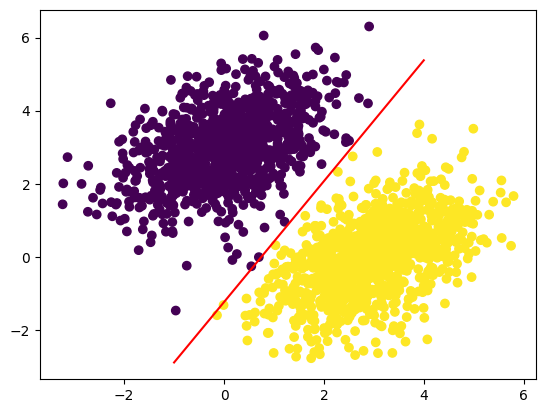

In [31]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# The **keras** API

The examples above show how to work with the low-level **tensorflow** interface. In practice, you can skip a lot of the detail by using the **keras** API. In the code below, we'll build a multi-layer neural network to perform a classification exercise. 

## Keras workflow

Building a deep learning model through Keras requires a series of steps:

1. Create training data as tensors. This should include the input features and the target as separate tensors. For the simple models we are looking at in this lab, this is fairly straightforward, but for the more complex models, careful attention is required to the size and shape of these tensors.
2. Create the network architecture. This consists of the set of layers that link the inputs to the target(s)
3. Define the loss function, the optimizer and the performance metrics to be used to test the progress of the training
4. Train the model using the training data, with part of the training data left out as validation data

## Dataset

The data are from the file *credit_data.csv*, and represent a number of bank clients who have been tagged as having good or bad credit. The goal is to use the other variables in the file to predict this. Let's start by reading in the data. 


In [32]:
df = pd.read_csv("./datafiles/credit_data.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,good,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,bad,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,good,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,good,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [33]:
df.shape

(4454, 14)

In [34]:
df = df.dropna()
df.shape

(4039, 14)

In [35]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [36]:
X = df.drop('Status', axis=1)

y = (df['Status'] == 'good').astype(int)

In [37]:
X = pd.get_dummies(X, drop_first=True, dtype='int')

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [41]:
print(f"Training size {X_train.shape}")
print(f"Validation size {X_valid.shape}")
print(f"Testing size {X_test.shape}")

Training size (2584, 22)
Validation size (647, 22)
Testing size (808, 22)


In [42]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(shape=(20,)), 
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="relu")
])

model

<Sequential name=sequential, built=True>

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

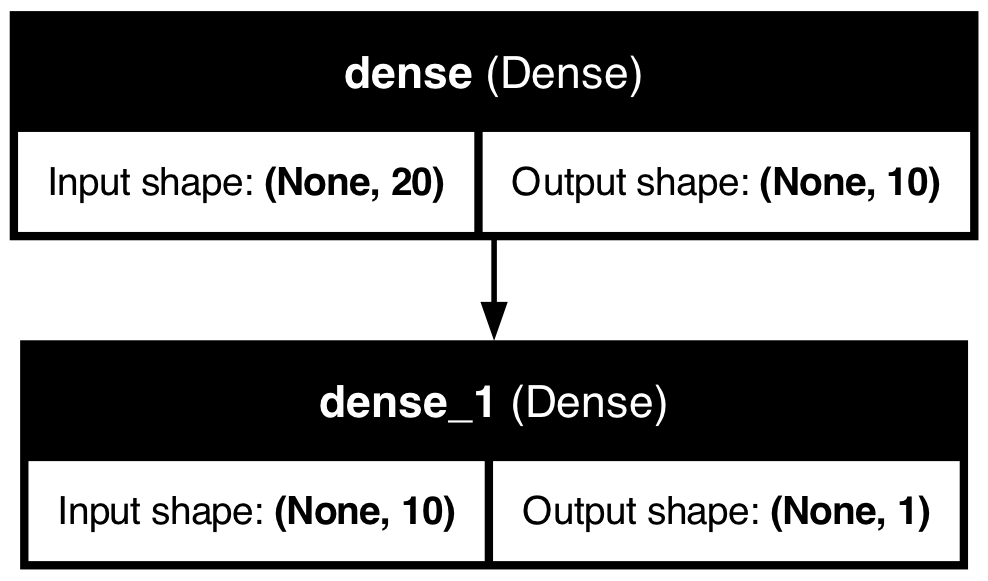

In [44]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

model <-
  keras_model_sequential(input_shape = ncol(train_features)) |>
  layer_dense(256, activation = "relu") |>
  layer_dropout(0.3) |>
  layer_dense(256, activation = "relu") |>
  layer_dropout(0.3) |>
  layer_dense(1, activation = "sigmoid")

summary(model)


In [45]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)), 
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
], name = "credit_model")

model.summary()

Model: "credit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,937 (281.00 KB)

 Trainable params: 71,937 (281.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
metrics = ['accuracy']

In [47]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=metrics)

In [48]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=30,
                    batch_size=256
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5957 - loss: 0.6779 - val_accuracy: 0.7496 - val_loss: 0.5970
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7351 - loss: 0.6025 - val_accuracy: 0.7481 - val_loss: 0.5678
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5687 - val_accuracy: 0.7481 - val_loss: 0.5484
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.5481 - val_accuracy: 0.7543 - val_loss: 0.5330
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7536 - loss: 0.5369 - val_accuracy: 0.7589 - val_loss: 0.5194
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7543 - loss: 0.5298 - val_accuracy: 0.7666 - val_loss: 0.5069
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7678 - loss: 0.4988 - val_accuracy: 0.7759 - val_loss: 0.4957
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 0.4918 - val_accuracy: 0.7836 - val_loss:

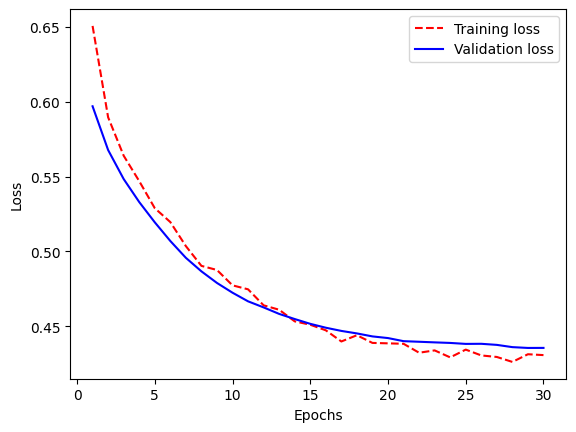

In [49]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

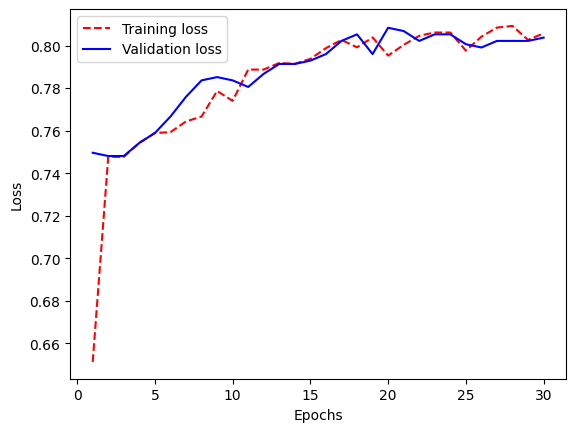

In [50]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "r--", label="Training loss")
plt.plot(epochs, val_accuracy, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [51]:
y_test_pred = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


In [52]:
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
y_test_pred[:,0]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred[:,0])

array([[ 74, 136],
       [ 42, 556]])

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred[:,0])

0.7797029702970297